### Шаблон домашнего задания №1 (простое)

<font size=2 color=grey> Вдохновлено семинарами по NLP Максима Рябина из BigData Team https://bigdatateam.org/ru

В данном ноутбуке вам предстоит реализовать модель классификации твитов с помошью логистической регрессии на признаках [Tf-Idf](https://ru.wikipedia.org/wiki/TF-IDF), затем померить качество предсказания на тестовой выборке и сравнить его с нейросетевой моделью, построенной на лекциях

In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.tokenize import TweetTokenizer

from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### <font color=green> Импортирование данных

Качаем общедоступные данные для задачи классификации токсичных твитов. Они те же самые, что были на лекции. Выборка представляет собой набор текстов на английском языке и метки классов для различных задач. Нас интересует задача по классификации текстов на "токсичный" или "нет", поэтому будем использовать метку `toxic`.

In [2]:
!wget -q -nc https://raw.githubusercontent.com/tianqwang/Toxic-Comment-Classification-Challenge/master/data/train.csv

In [3]:
kaggle_data = pd.read_csv("train.csv")

In [4]:
kaggle_data.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0


### <font color=green> Токенизация текстов

Составлять словарь и кодировать последовательности токенов числами уже не требуется, т.к будем считать значения Tf-Idf `nltk.tokenize.TweetTokenizer`,  сопостовляя каждому тексту вектор из признаков Tf-Idf

In [5]:
tokenizer = TweetTokenizer()
preprocess = lambda text: ' '.join(tokenizer.tokenize(text.lower()))

text = "It's a lecture for Russian Programming School!"
print("Пример до токенизации:", text,)
print("После токенизации:", preprocess(text))

Пример до токенизации: It's a lecture for Russian Programming School!
После токенизации: it's a lecture for russian programming school !


Отделяем целевую метку классов от текстов и формируем списки текстов и их меток после токенизации

In [6]:
%%time
texts = kaggle_data['comment_text']
target = kaggle_data['toxic']

texts_train, texts_test, y_train, y_test = train_test_split(texts, target, test_size=1000, random_state=42)

CPU times: user 30.1 ms, sys: 993 µs, total: 31 ms
Wall time: 31 ms


In [7]:
%%time
# используя функцию preprocess, определенную выше ,
# уложите тексты и их метки в списки, подобно тому, как это делалось на лекции

texts_train = [preprocess(text) for text in texts_train.tolist()]  # ваш код!
texts_test = [preprocess(text) for text in texts_test.tolist()]  # ваш код!

CPU times: user 27.6 s, sys: 121 ms, total: 27.7 s
Wall time: 27.8 s


In [29]:
len(texts_train), y_train.shape, len(texts_test), y_test.shape

(158571, (158571,), 1000, (1000,))

### <font color=green> Подсчет признаков Tf-Idf

Прочитайте про то, что из себя представляет Tf-Idf в [Википедии](https://ru.wikipedia.org/wiki/TF-IDF) и воспользуйтесь инструментом `sklearn.feature_extraction.text.TfidfVectorizer`, чтобы сформировать для каждого текста вектор Tf-Idf-признаков

In [35]:
%%time
tfidf=TfidfVectorizer()
# C помощью инструмента `sklearn.feature_extraction.text.TfidfVectorizer` сформируйте для каждого текста вектор Tf-Idf-признаков
X_train_tfidf=tfidf.fit(texts_train)

X_train_tfidf=tfidf.transform(texts_train)  # ваш код здесь
X_test_tfidf=tfidf.transform(texts_test)  # ваш код здесь

CPU times: user 18.2 s, sys: 61.4 ms, total: 18.3 s
Wall time: 18.3 s


In [38]:
X_train_tfidf.shape

(158571, 187365)

### <font color=green> Задание модели и обучение

Мы подготовили данные, теперь самое время задать модель, функцию потерь, и провести обучение, оптимизируя функцию потерь... Однако, в этот раз не потребуется описывать все компоненты: воспользуемся готовым решение логистической регрессии от scikit-learn [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), которую можно обучить "из коробки", применив метод `fit`, не задавая при этом ни функции потерь, ни оптимизатора, ни цикла изменения параметров модели.

Эта модель в отличие от рассмотренной нами на лекции нейронной сети, не содержит рекурентых блоков, а фактически представляет собой "сеть" всего из одного слоя, выход которого преобразуется сигмоидой (см. про функцию активации в ноутбуке с нейронной сетью). Модель по прежнему должна предсказывать вероятность близкую к нулю для хороших твитов и близкую к единице для плохих

In [39]:
%%time
model = LogisticRegression()

# напишите строчку кода, которая будет обучать указанную выше модель линейной регрессии на наборе (X_train_tfidf, y_train)
tfidf_model = model.fit(X_train_tfidf, y_train)
# ваш код ниже



CPU times: user 13.8 s, sys: 13.9 s, total: 27.7 s
Wall time: 14.2 s


### <font color=green> Тестирование

Запустите код из ячейки ниже и сравните полученные метрики Accuracy и ROC AUC с метриками, полученными на лекции при обучении нейронной сети

<font color=red size=6> ! </font> <font color=red> Напомню, что метрика Accuracy позволяет оценить какой процент объектов классифицируется моделью верно, а метрика ROC AUC позволяет оценить ранжирующую способность модели (способность модели назначать низкие вероятность, близкие к нулю, хорошим твитам и высокую вероятность, близкую к одному, для токсичных твитов)

In [40]:
X_train_tfidf.shape, y_train.shape

((158571, 187365), (158571,))

In [41]:
X_test_tfidf.shape, y_test.shape

((1000, 187365), (1000,))

Accuracy на  train 0.962426925478177
Accuracy на  test  0.95


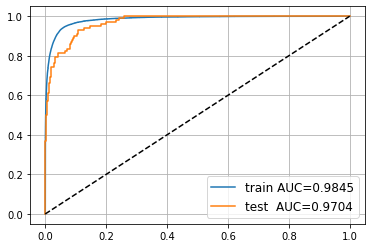

In [42]:
for name, X, y, model in [
    ('train', X_train_tfidf, y_train, tfidf_model),
    ('test ', X_test_tfidf, y_test, tfidf_model)
]:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    accuracy = accuracy_score(y, [1 if x>0.5 else 0 for x in proba])
    print('Accuracy на ', name, accuracy)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

### <font color = green> Напишите вывод: </font>

1) Сопоставимо ли качество моделей с точки зрения процента верно-классифицированных твитов на тестовой выборке?

Качество моделей примерно сопоставимо:
рекурентная сеть показала точность 96.2%
TF-IDF-векторизация дала точность 95%

2) Какая из моделей, на ваш взгляд, потребовала больше усилий для обучения?

Безусловно, рекурентная сеть потребовала больше времени и усилий на подготовку данных, подготовку и обучение модели.
Тогда как TF-IDF позволяет буквально за несколько команд получить готовый результат. Причем, при использовании инструмента Pipe (пайплайны) есть возможность еще более упростить обработку текста и проведение тестирования, чуть ли не до двух строчек кода. 

3) Какая модель переобучилась или переобучились обе?

На проведенных самостоятельно экспериментах, если судить по графикам, признаков переобучения не обнаружено в обоих случаях

4) У какой модели лучше ранжирующая способность?

Исходя из того, что в обоих случаях на выходе мы получаем не дискретный результат (0 или 1), а непрерывный (от 0 до 1), то в обоих случаях мы получаем одинаковую возможность ранжировать тексты.